## Table of Content:<a class="anchor" id="Table"></a>

* [1. Problem Statement](#Problem_Statement)
    * [1.1. Data Dictionary](#Data_Dictionary)
    * [1.2. Objectives](#Obj)
    * [1.3. Approach](#Approach)
* [2. Extract Data](#Data_Extract)
    * [2.1. Import Libraries](#Lib)
    * [2.2. Kaggle API](#API)
    * [2.3 Exploratory Data Analysis](#Explore)
    * [2.4 Remove Features](#Remove)
* [3. Visualization](#Visual)
    * [3.1. Outlier](#Outlier)
    * [3.2. Heatmap](#Heatmap)
* [4. Principle Component Analysis](#PCA)
    * [4.1. Import Libraries](#PCALib)
    * [4.2. Encode Data](#Encode)
    * [4.3. User Defined Function](#Functions)
    * [4.4. Scale Data](#Scale)
    * [4.5. Describe Normalized Data](#DNormal)
    * [4.6. Describe Standarized Data](#DStand)
* [5. Normalized Principle Component Analysis](#NPCA)
    * [5.1. Normal PCA Plot](#NPCA_Plot)
    * [5.2. PCA Normal Sum Variance Ratio](#NPCA_VSum)
* [6. Standardized Principle Component Analysis](#SPCA)
    * [6.1. Standard PCA Plot](#SPCA_Plot)
    * [6.2. PCA Standard Sum Variance Ratio](#SPCA_VSum)
* [7. Conclusion](#Conclusion)    


### 1. Problem Statement<a class="anchor" id="Problem_Statement"></a>
Uncover the factors that lead to employee attrition and explore essential questions such as `show me a breakdown of factors in attrition`. 

#### 1.1. Data Dictionary<a class="anchor" id="Data_Dictionary"></a>

- Education
    - 1 'Below College'
    - 2 'College'
    - 3 'Bachelor'
    - 4 'Master'
    - 5 'Doctor'


- Environment Satisfaction
    - 1 'Low'
    - 2 'Medium'
    - 3 'High'
    - 4 'Very High'


- Job Involvement
    - 1 'Low'
    - 2 'Medium'
    - 3 'High'
    - 4 'Very High'


- Job Satisfaction
    - 1 'Low'
    - 2 'Medium'
    - 3 'High'
    - 4 'Very High'


- Performance Rating
    - 1 'Low'
    - 2 'Good'
    - 3 'Excellent'
    - 4 'Outstanding'


- Relationship Satisfaction
    - 1 'Low'
    - 2 'Medium'
    - 3 'High'
    - 4 'Very High'


- Work Life Balance
    - 1 'Bad'
    - 2 'Good'
    - 3 'Better'
    - 4 'Best'
    
*[<u>`Go back`</u>](#Table)*

#### 1.2. Objectives<a class="anchor" id="Obj"></a>

Employee Attrition Cause & Prediction


#### 1.3. Approach<a class="anchor" id="Approach"></a>

- Data cleaning and EDA 
- Evaluating multiple supervised machine learning models
- Finding the optimum model for this project 
- Explaine Machine Learning Prediction
- Conclusion

*[<u>`Go back`</u>](#Table)*

### 2. Extract Data via API<a class="anchor" id="Data_Extract"></a>

#### 2.1. Import Libraries<a class="anchor" id="Lib"></a>

In [1]:
# Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# unzip
import zipfile
import os
# 
path = './Data/'

#### 2.2. Connect to API & Load<a class="anchor" id="API"></a>

In [2]:
# Authenticating With API Server
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()
# 
!kaggle datasets download -d "pavansubhasht/ibm-hr-analytics-attrition-dataset"
!mv *.zip ./Data/
filename = !ls ./Data/*.zip
# Unzip
with zipfile.ZipFile(filename[0], mode='r') as unzipit:
    unzipit.extractall(path=path)
# Delete ZIP file
os.remove(filename[0])
# 
csv = !ls ./Data/WA_Fn-UseC_-HR-Employee-Attrition.csv
csv = csv[0]
# Read CSV into a DataFrame
df = pd.read_csv(csv)

  0%|                                               | 0.00/50.1k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 50.1k/50.1k [00:00<00:00, 2.61MB/s]


*[<u>`Go back`</u>](#Table)*
#### 2.3. Exploratory Data Analysis<a class="anchor" id="Explore"></a>

In [3]:
# Display first 5 records
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

1,470 records with 35 Features

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# Change categorical feature to categorical datatypes 
df = df.astype({"BusinessTravel": 'category', "Department": 'category', 
                "Education": 'category', "EducationField": 'category', "EnvironmentSatisfaction": 'category', 
                "Gender": 'category', "JobInvolvement": 'category', "JobLevel": 'category', 
                "JobLevel": 'category', "JobRole": 'category', "JobSatisfaction": 'category', 
                "MaritalStatus": 'category', "NumCompaniesWorked": 'category', "Over18": 'category', 
                "OverTime": 'category',"PerformanceRating": 'category',"RelationshipSatisfaction": 'category',
                "StockOptionLevel": 'category', "TrainingTimesLastYear": 'category',
                "WorkLifeBalance": 'category'})

In [7]:
# listing of all the numeric columns
numeric_cols = df.select_dtypes(include=['int64']).columns.tolist()
# listing of all the categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [8]:
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.00,14235.5,20461.50,26999.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.00,14.0,18.00,25.0
StandardHours,1470.0,80.000000,0.000000,80.0,80.00,80.0,80.00,80.0


In [9]:
df[categorical_cols].describe().T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
Education,1470,5,3,572
EducationField,1470,6,Life Sciences,606
EnvironmentSatisfaction,1470,4,3,453
Gender,1470,2,Male,882
JobInvolvement,1470,4,3,868
JobLevel,1470,5,1,543
JobRole,1470,9,Sales Executive,326


#### Note: 
All the columns below contain a single value that will be removed because it would NOT add any value and there is no missing values in this dataset.
- EmployeeCount
- StandardHours
- Over18
- EmployeeNumber: Employee ID number to be removed

**Note: All the columns below has a large gap between 75% and Max**
- MonthlyIncome
- TotalWorkingYears
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager

*[<u>`Go back`</u>](#Table)*

#### 2.4. Remove Features<a class="anchor" id="Remove"></a>

In [10]:
# Remove features 
rem = ['EmployeeCount', 'StandardHours','Over18','EmployeeNumber']
df.drop(rem, axis=1, inplace=True)

In [11]:
# Reinitialize
# listing of all the numeric columns
numeric_cols = df.select_dtypes(include=['int64']).columns.tolist()
# listing of all the categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [12]:
df[categorical_cols].describe().T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
Education,1470,5,3,572
EducationField,1470,6,Life Sciences,606
EnvironmentSatisfaction,1470,4,3,453
Gender,1470,2,Male,882
JobInvolvement,1470,4,3,868
JobLevel,1470,5,1,543
JobRole,1470,9,Sales Executive,326


In [13]:
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.0,14235.5,20461.50,26999.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.0,14.0,18.00,25.0
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.00,40.0
YearsAtCompany,1470.0,7.008163,6.126525,0.0,3.0,5.0,9.00,40.0
YearsInCurrentRole,1470.0,4.229252,3.623137,0.0,2.0,3.0,7.00,18.0


*[<u>`Go back`</u>](#Table)*

### 3. Data Visualization<a class="anchor" id="Visual"></a>

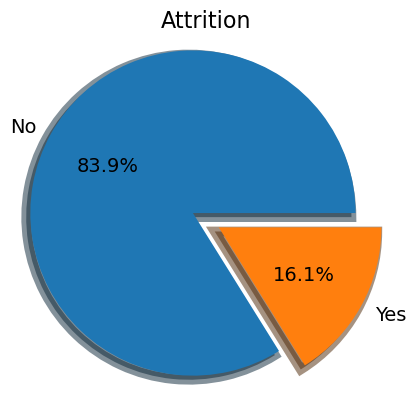

In [14]:
#define data
data = df['Attrition'].value_counts()
labels = ['No', 'Yes']
# 
#create pie chart
plt.pie(data, labels = labels, radius= 1.1, shadow=True, autopct='%.1f%%', 
        textprops = {'color': 'Black','fontsize':14}, wedgeprops = {'linewidth': 7}, explode = [0.10]*2)
plt.title("Attrition", fontsize=16)
plt.show()

This dataset is imbalance, and 16.1% have left the company.

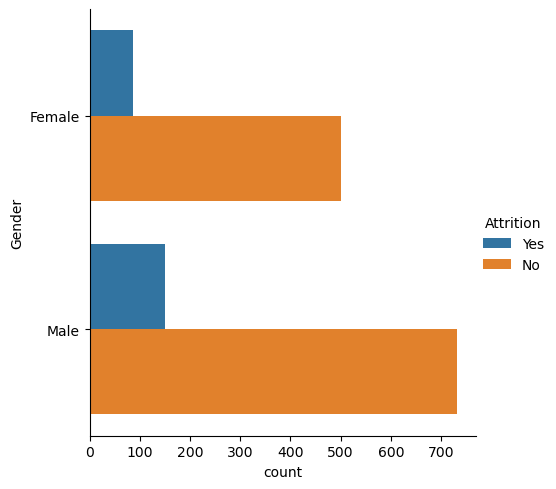

In [15]:
# Seaborn Count plot
sns.catplot(y='Gender', kind='count', hue ='Attrition', data=df);

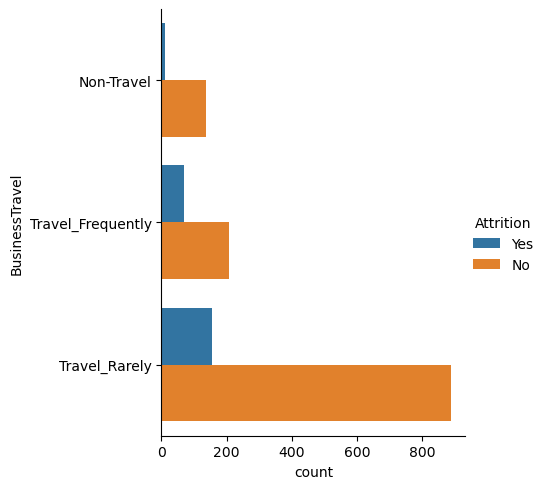

In [16]:
# Seaborn Count plot
sns.catplot(y='BusinessTravel', hue='Attrition', kind = 'count', data=df);

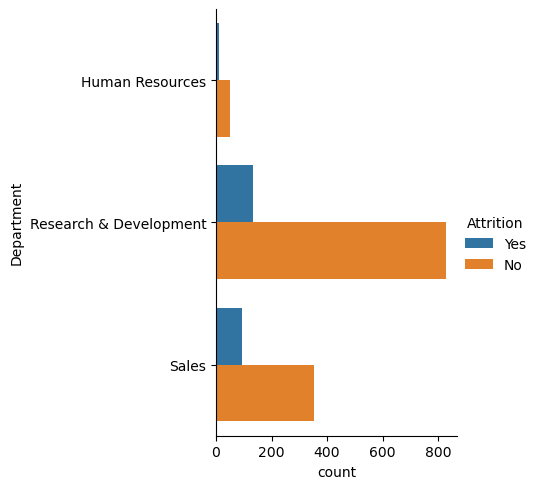

In [17]:
# Seaborn Count plot
sns.catplot(y='Department', hue='Attrition', kind = 'count', data=df);

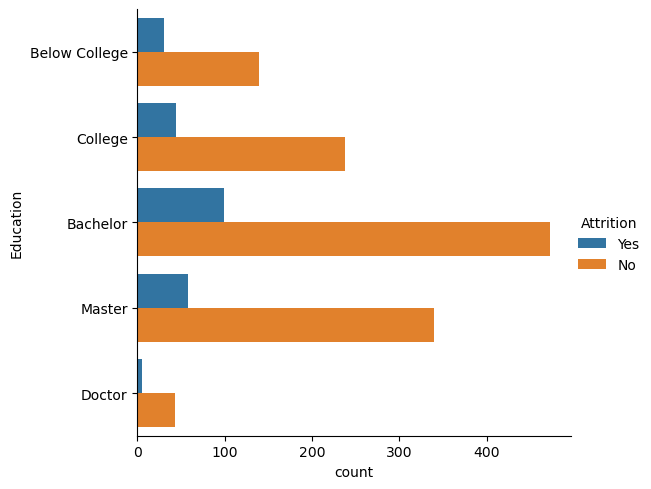

In [18]:
# Seaborn Count plot
sns.catplot(y='Education', hue='Attrition', kind = 'count', data=df)
plt.yticks([0,1,2,3,4],['Below College','College', 'Bachelor', 'Master', 'Doctor']);

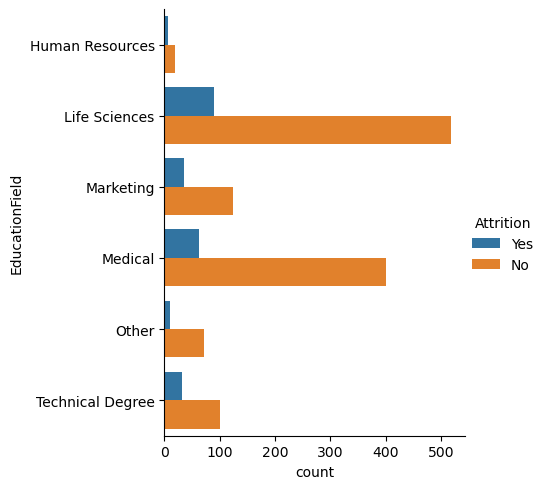

In [19]:
# Seaborn Count plot
sns.catplot(y='EducationField', hue='Attrition', kind = 'count', data=df);

*[<u>`Go back`</u>](#Table)*

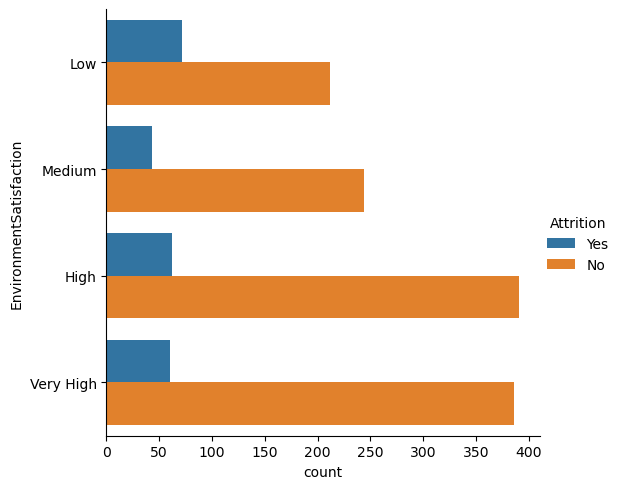

In [20]:
# Seaborn Count plot
sns.catplot(y='EnvironmentSatisfaction', hue='Attrition', kind = 'count', data=df)
plt.yticks([0,1,2,3],['Low','Medium', 'High', 'Very High']);

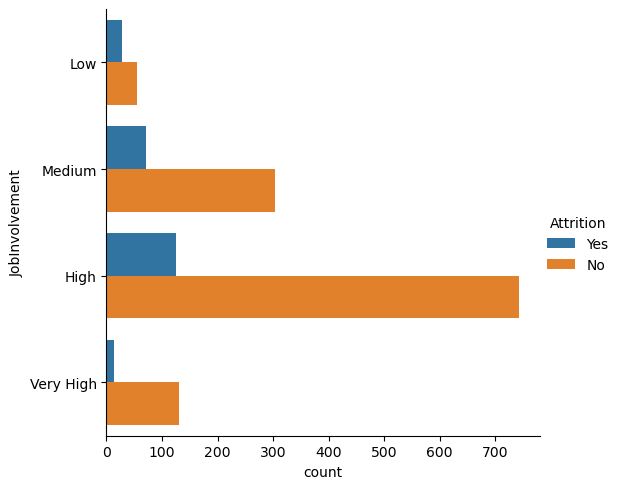

In [21]:
# Seaborn Count plot
sns.catplot(y='JobInvolvement', hue='Attrition', kind = 'count', data=df)
plt.yticks([0,1,2,3],['Low','Medium', 'High', 'Very High']);

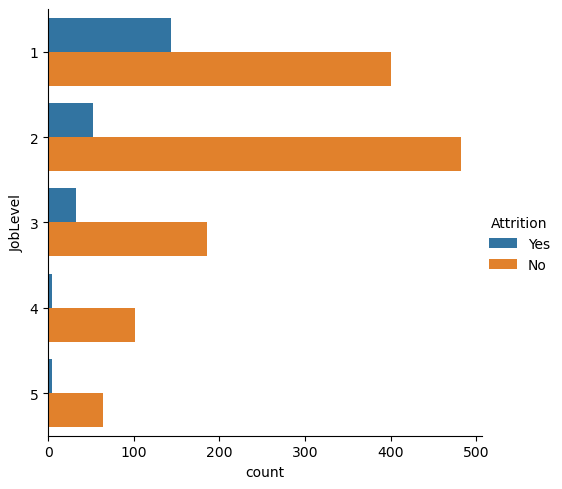

In [22]:
# Seaborn Count plot
sns.catplot(y='JobLevel', hue='Attrition', kind = 'count', data=df);

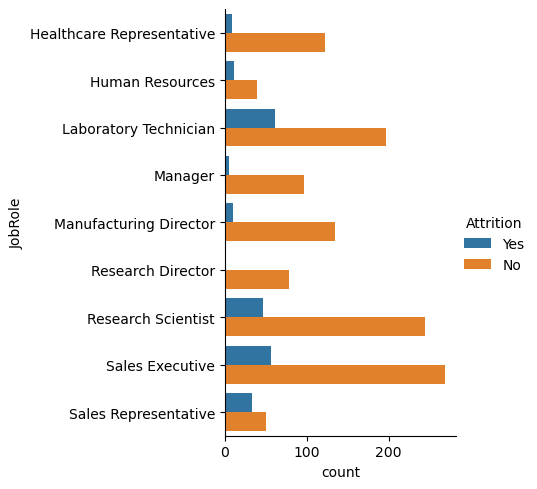

In [23]:
# Seaborn Count plot
ax = sns.catplot(y='JobRole', hue='Attrition', kind = 'count', data=df)

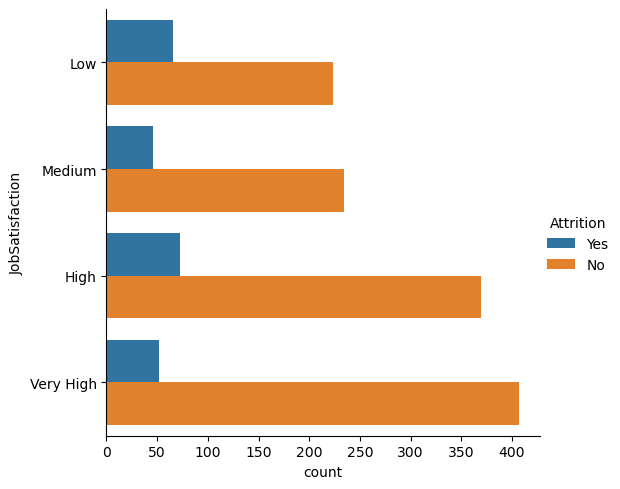

In [24]:
# Seaborn Count plot
sns.catplot(y='JobSatisfaction', hue='Attrition', kind = 'count', data=df)
plt.yticks([0,1,2,3],['Low','Medium', 'High', 'Very High']);

*[<u>`Go back`</u>](#Table)*

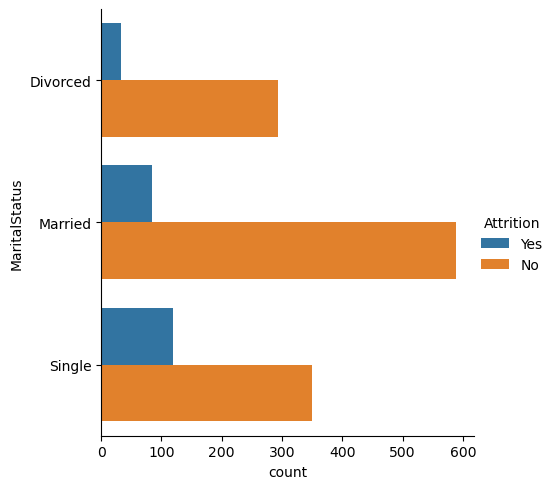

In [25]:
# Seaborn Count plot
sns.catplot(y='MaritalStatus', hue='Attrition', kind = 'count', data=df);

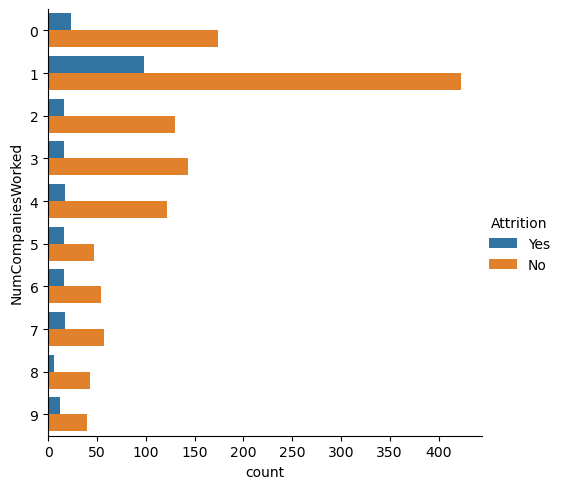

In [26]:
# Seaborn Count plot
sns.catplot(y='NumCompaniesWorked', hue='Attrition', kind = 'count', data=df);

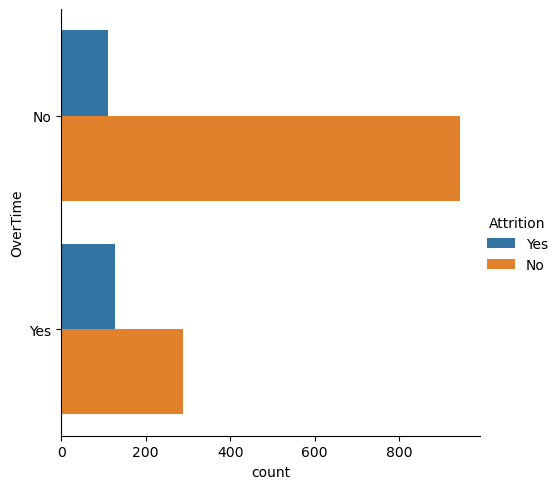

In [27]:
# Seaborn Count plot
sns.catplot(y='OverTime', hue='Attrition', kind = 'count', data=df);

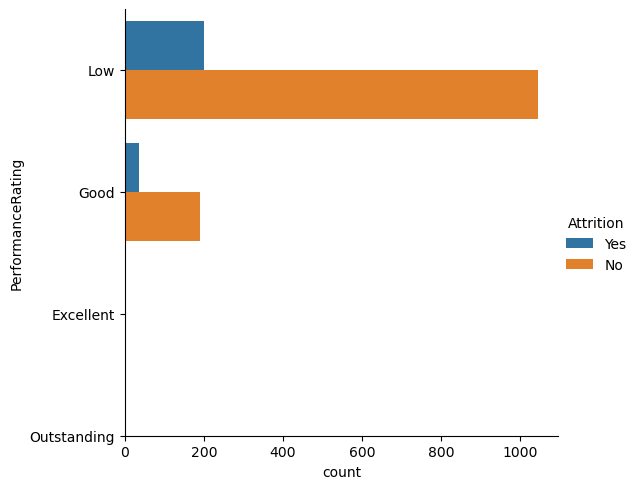

In [28]:
# Seaborn Count plot
sns.catplot(y='PerformanceRating', hue='Attrition', kind = 'count', data=df)
plt.yticks([0,1,2,3],['Low','Good', 'Excellent', 'Outstanding']);

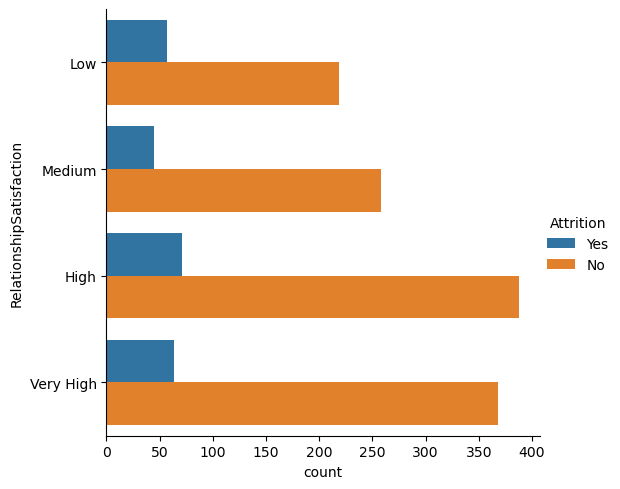

In [29]:
# Seaborn Count plot
sns.catplot(y='RelationshipSatisfaction', hue='Attrition', kind = 'count', data=df)
plt.yticks([0,1,2,3],['Low','Medium', 'High', 'Very High']);

*[<u>`Go back`</u>](#Table)*

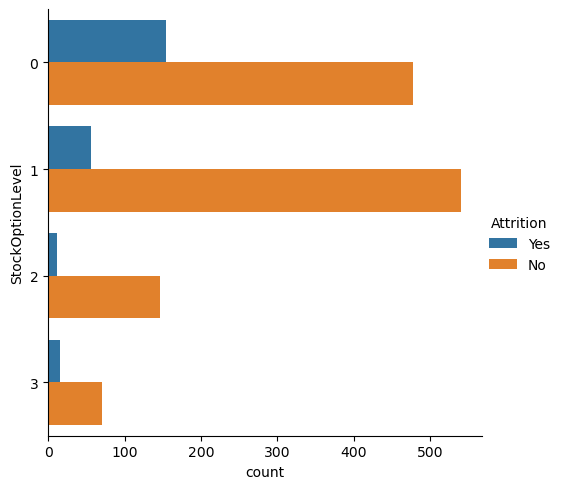

In [30]:
# Seaborn Count plot
sns.catplot(y='StockOptionLevel', hue='Attrition', kind = 'count', data=df);

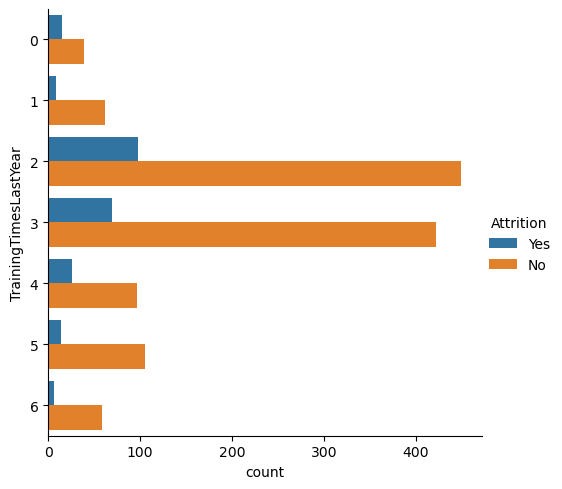

In [31]:
# Seaborn Count plot
sns.catplot(y='TrainingTimesLastYear', hue='Attrition', kind = 'count', data=df);

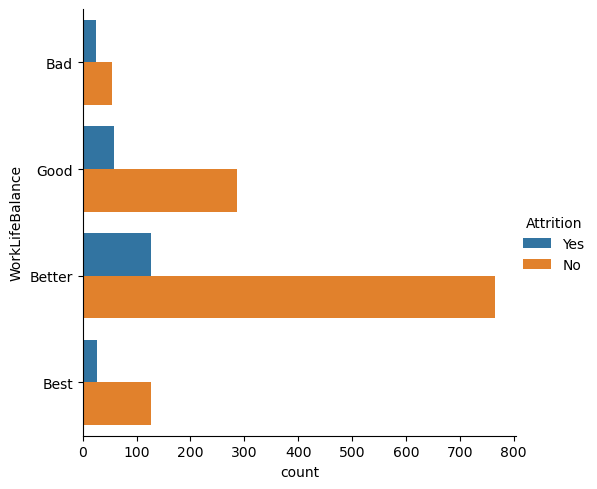

In [32]:
# Seaborn Count plot
sns.catplot(y='WorkLifeBalance', hue='Attrition', kind = 'count', data=df)
plt.yticks([0,1,2,3],['Bad','Good', 'Better', 'Best']);

#### 3.1. Outlier<a class="anchor" id="Outlier"></a>

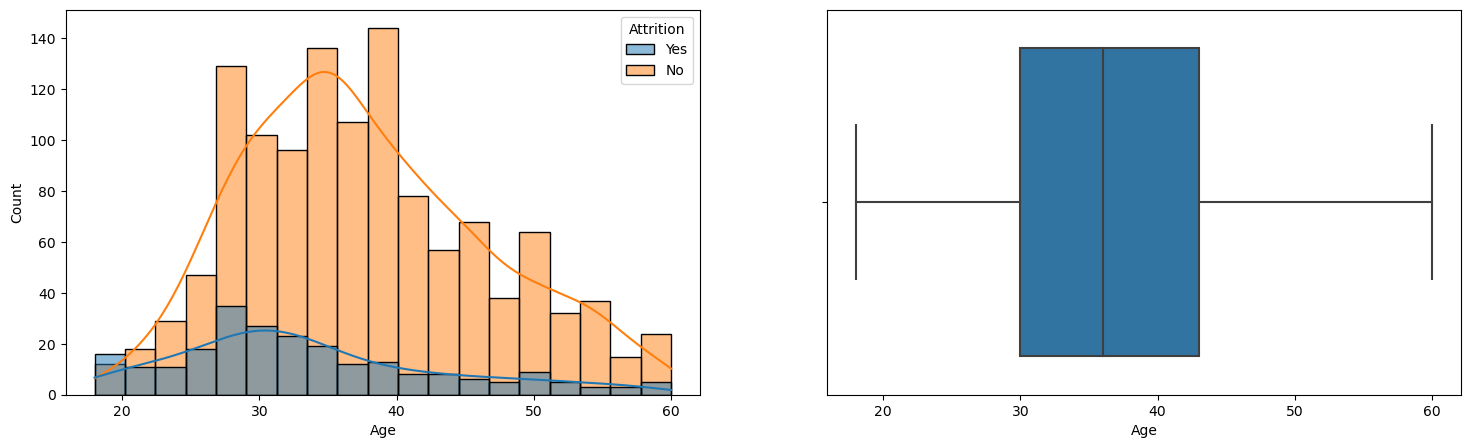

In [33]:
sns.reset_defaults()
# 
fig, axes = plt.subplots(1,2, figsize=(18,5))
sns.histplot(ax=axes[0],x='Age', hue='Attrition', kde=True, data=df)
sns.boxplot(ax=axes[1], x='Age',hue='Attrition', data=df)
plt.show();

In [34]:
# Data Issue: Require source correction or/and investigation
# will proceed with the data
df.Attrition[df.Age < 21].value_counts()

Yes    16
No     12
Name: Attrition, dtype: int64

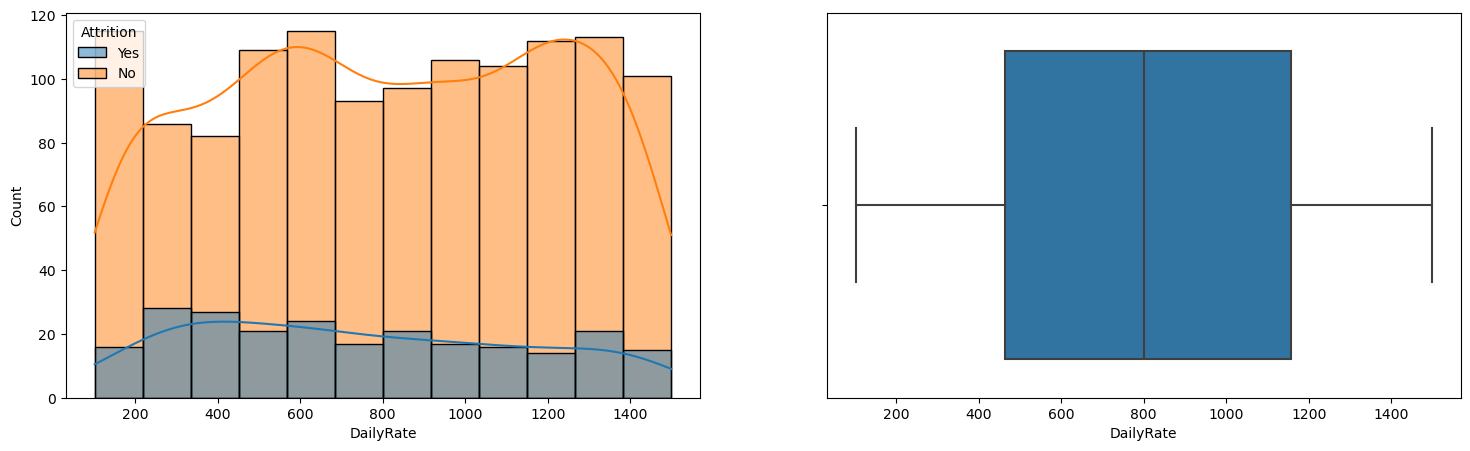

In [35]:
fig, axes = plt.subplots(1,2, figsize=(18,5))
sns.histplot(ax=axes[0],x='DailyRate', hue='Attrition', kde=True, data=df)
sns.boxplot(ax=axes[1], x='DailyRate',hue='Attrition', data=df)
plt.show();

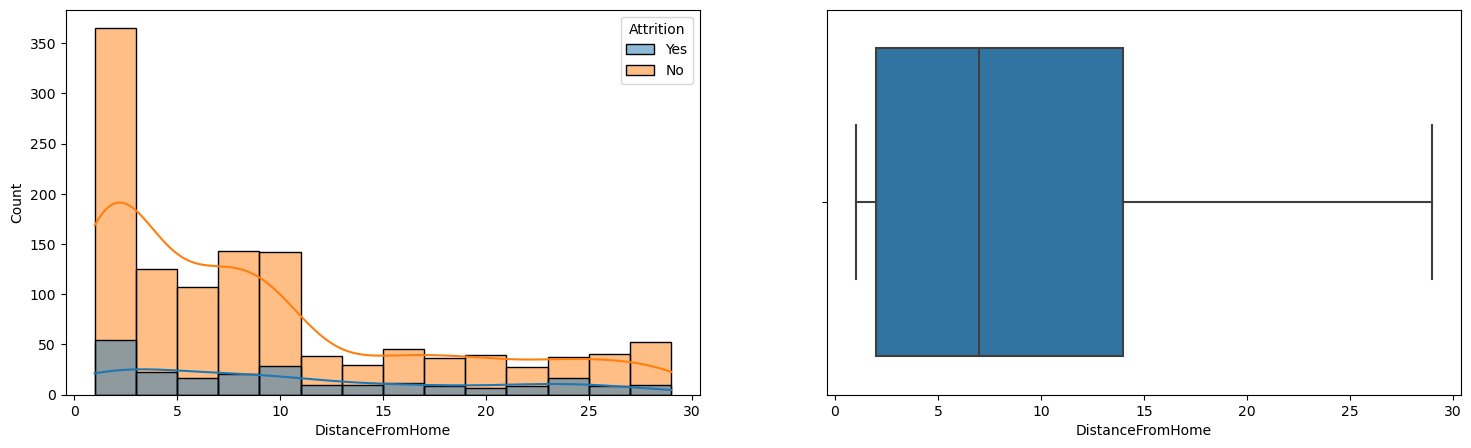

In [36]:
fig, axes = plt.subplots(1,2, figsize=(18,5))
sns.histplot(ax=axes[0],x='DistanceFromHome', hue='Attrition', kde=True, data=df)
sns.boxplot(ax=axes[1], x='DistanceFromHome',hue='Attrition', data=df)
plt.show();

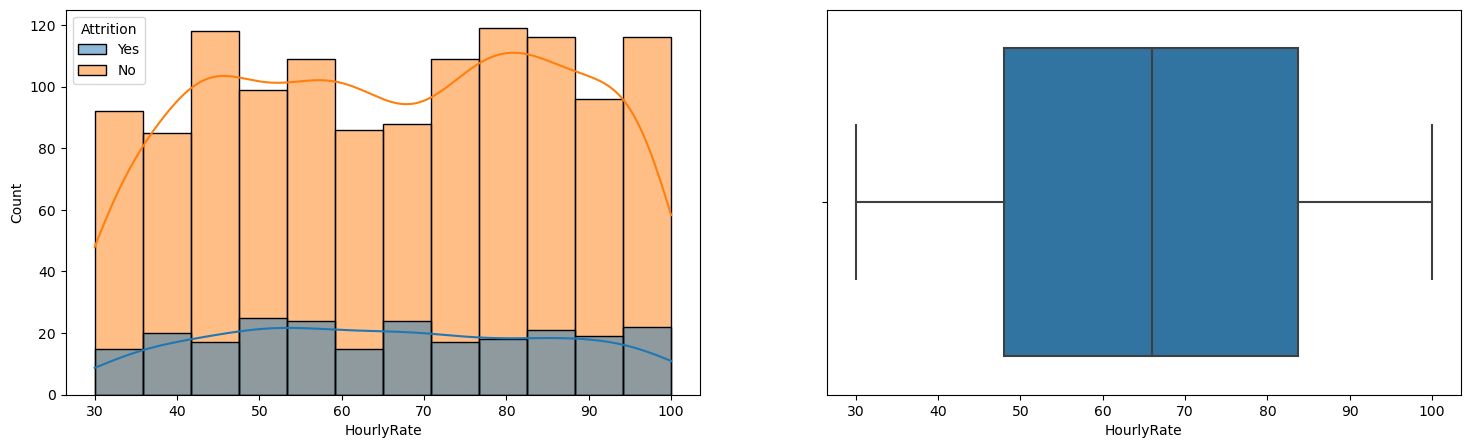

In [37]:
fig, axes = plt.subplots(1,2, figsize=(18,5))
sns.histplot(ax=axes[0],x='HourlyRate', hue='Attrition', kde=True, data=df)
sns.boxplot(ax=axes[1], x='HourlyRate',hue='Attrition', data=df)
plt.show();

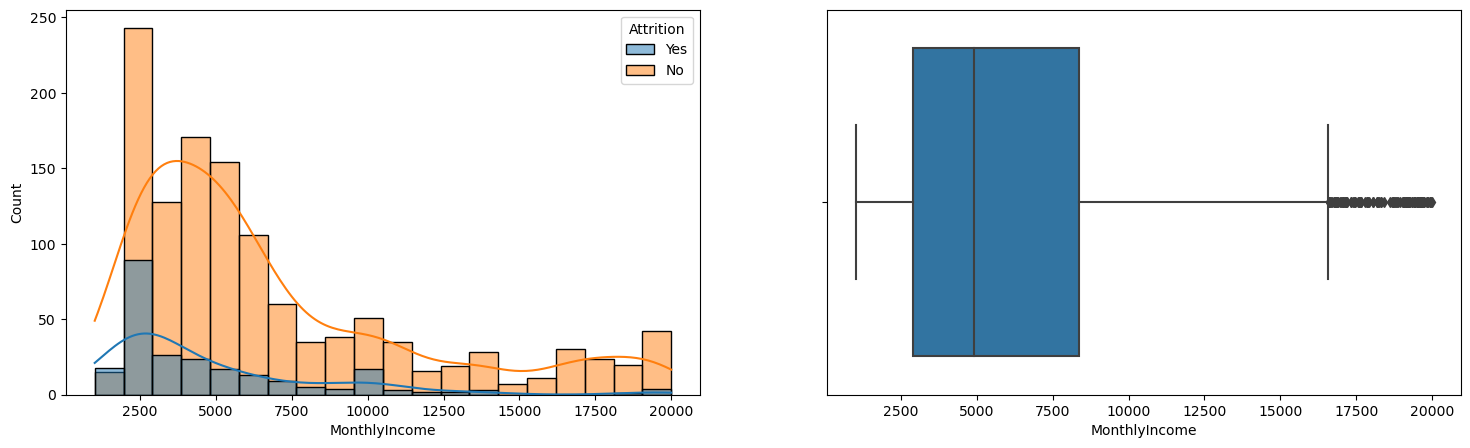

In [38]:
fig, axes = plt.subplots(1,2, figsize=(18,5))
sns.histplot(ax=axes[0],x='MonthlyIncome', hue='Attrition', kde=True, data=df)
sns.boxplot(ax=axes[1], x='MonthlyIncome',hue='Attrition', data=df)
plt.show();

In [39]:
# Display outliers
df.MonthlyIncome[df.MonthlyIncome > 17000].count()

97

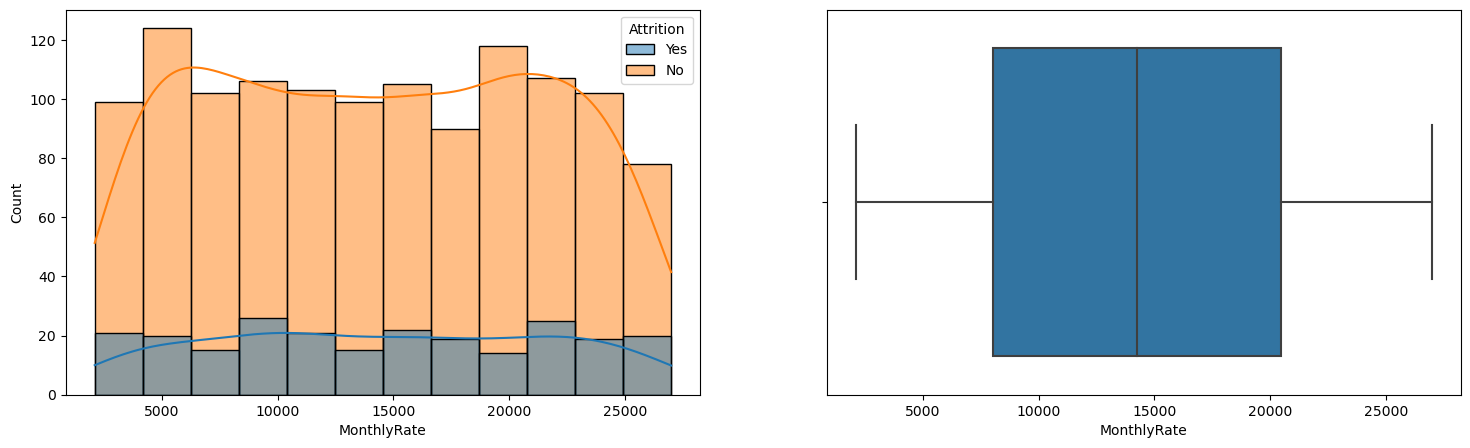

In [40]:
fig, axes = plt.subplots(1,2, figsize=(18,5))
sns.histplot(ax=axes[0],x='MonthlyRate', hue='Attrition', kde=True, data=df)
sns.boxplot(ax=axes[1], x='MonthlyRate',hue='Attrition', data=df)
plt.show();

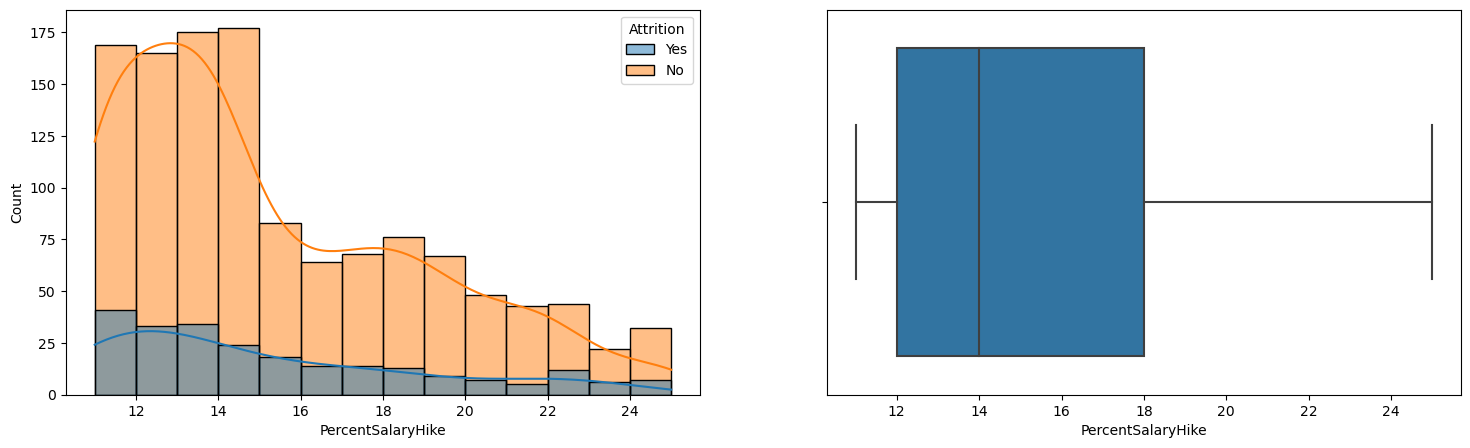

In [41]:
fig, axes = plt.subplots(1,2, figsize=(18,5))
sns.histplot(ax=axes[0],x='PercentSalaryHike', hue='Attrition', kde=True, data=df)
sns.boxplot(ax=axes[1], x='PercentSalaryHike',hue='Attrition', data=df)
plt.show();

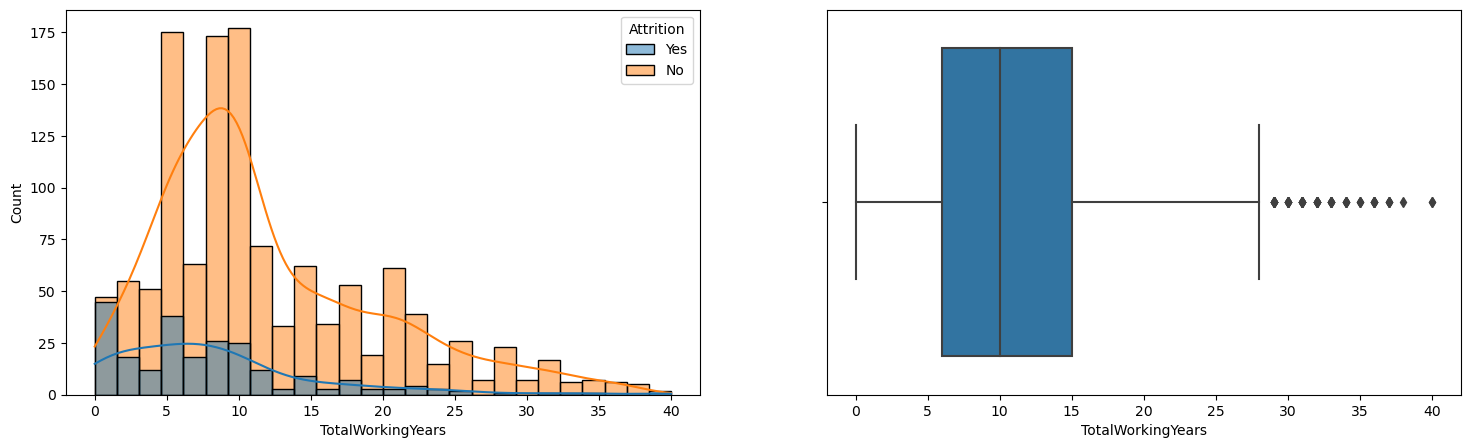

In [42]:
fig, axes = plt.subplots(1,2, figsize=(18,5))
sns.histplot(ax=axes[0],x='TotalWorkingYears', hue='Attrition', kde=True, data=df)
sns.boxplot(ax=axes[1], x='TotalWorkingYears',hue='Attrition', data=df)
plt.show();

In [43]:
# display outliers
df.TotalWorkingYears[df.TotalWorkingYears > 28].count()

63

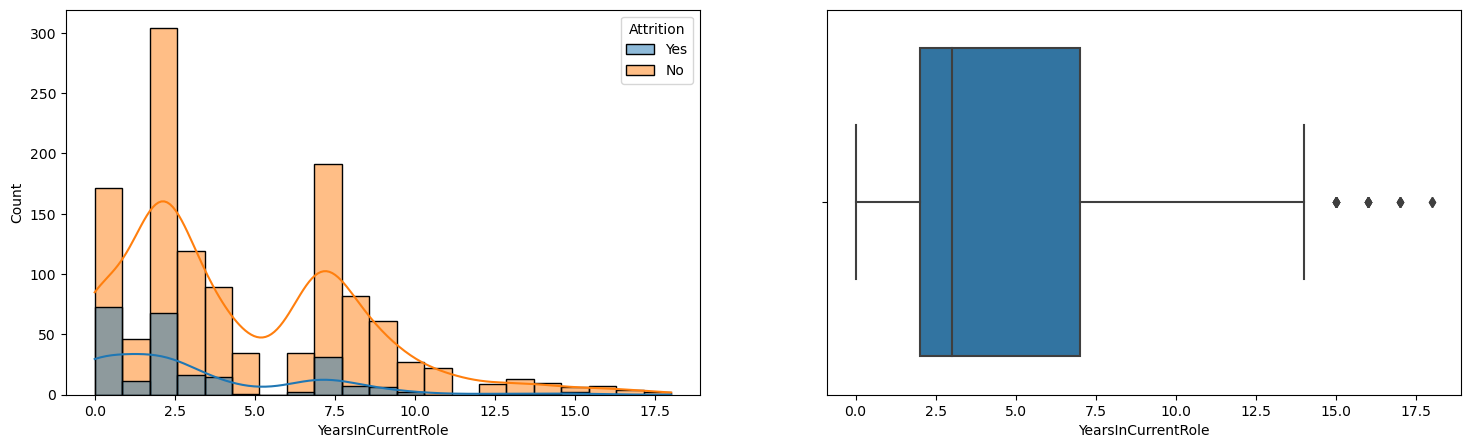

In [44]:
fig, axes = plt.subplots(1,2, figsize=(18,5))
sns.histplot(ax=axes[0],x='YearsInCurrentRole', hue='Attrition', kde=True, data=df)
sns.boxplot(ax=axes[1], x='YearsInCurrentRole',hue='Attrition', data=df)
plt.show();

In [45]:
# display outliers
df.YearsInCurrentRole[df.YearsInCurrentRole > 14].count()

21

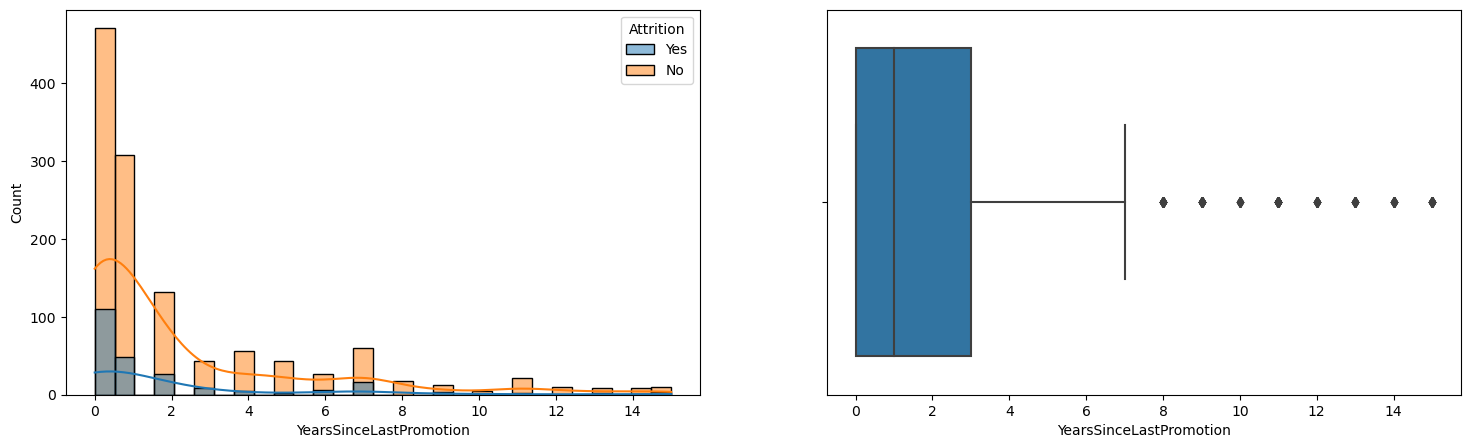

In [46]:
fig, axes = plt.subplots(1,2, figsize=(18,5))
sns.histplot(ax=axes[0],x='YearsSinceLastPromotion', hue='Attrition', kde=True, data=df)
sns.boxplot(ax=axes[1], x='YearsSinceLastPromotion',hue='Attrition', data=df)
plt.show();

In [47]:
# display outliers
df.YearsSinceLastPromotion[df.YearsSinceLastPromotion > 7].count()

107

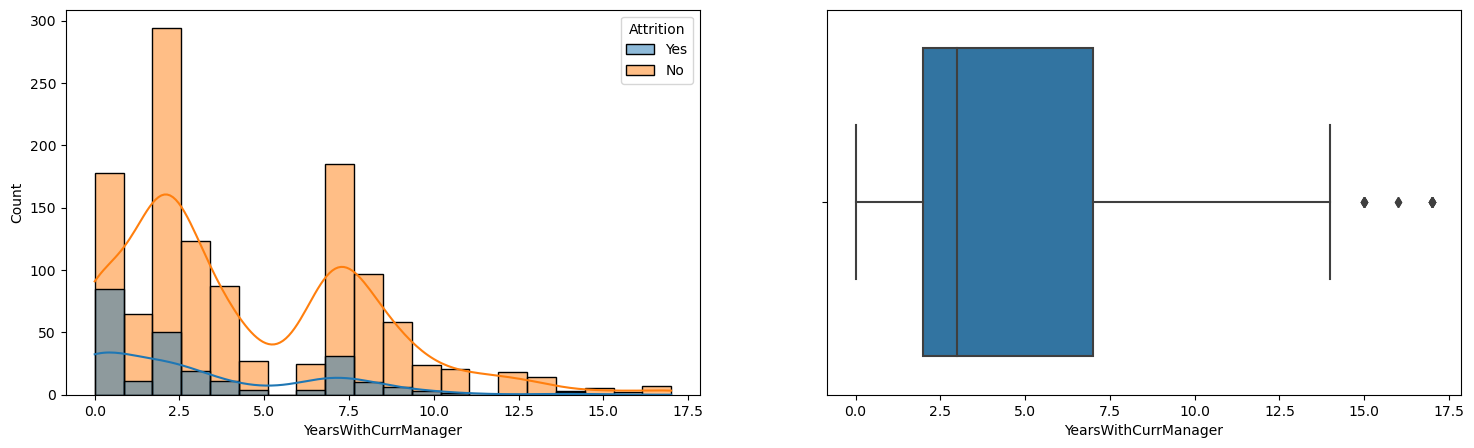

In [48]:
fig, axes = plt.subplots(1,2, figsize=(18,5))
sns.histplot(ax=axes[0],x='YearsWithCurrManager', hue='Attrition', kde=True, data=df)
sns.boxplot(ax=axes[1], x='YearsWithCurrManager',hue='Attrition', data=df)
plt.show();

In [49]:
# display outliers
df.YearsWithCurrManager[df.YearsWithCurrManager > 14].count()

14

*[<u>`Go back`</u>](#Table)*
#### 3.2. Heatmap<a class="anchor" id="Heatmap"></a>

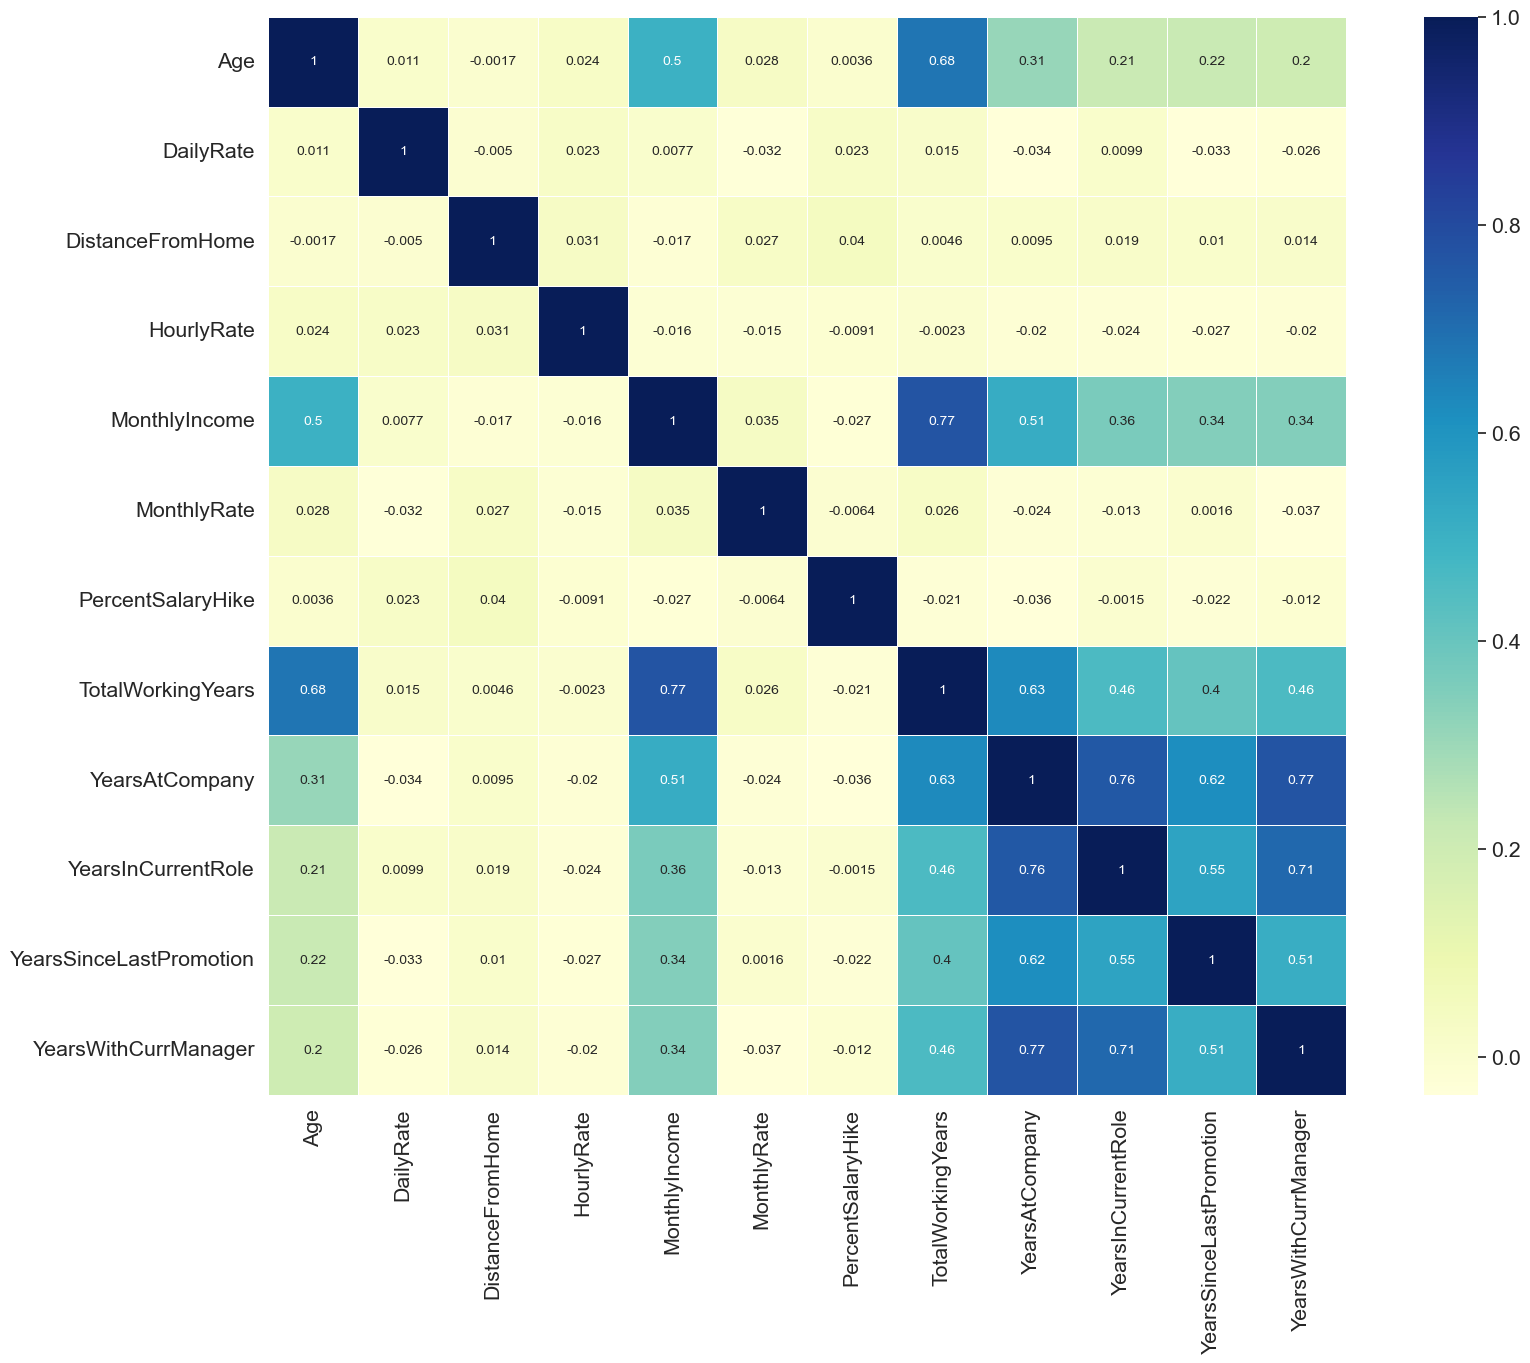

In [50]:
# Make a heatmap of the data
plt.figure(figsize=(20,14))
sns.set(font_scale = 1.4)
sns.heatmap(df.corr() ,annot=True, linewidths=.5, annot_kws={"size":10}, square=True, cmap='YlGnBu')
plt.show();

### 4. Principle Component Analysis (PCA)<a class="anchor" id="PCA"></a>

#### 4.1. Import Libraries<a class="anchor" id="PCALib"></a>

In [51]:
# data standardization with sklearn
from sklearn.preprocessing import StandardScaler
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# 
from sklearn.decomposition import PCA

#### 4.2. Encode Data<a class="anchor" id="Encode"></a>

In [52]:
df.drop('Attrition', axis=1, inplace=True)
# encode categorical data
df = pd.get_dummies(df, drop_first=True)
# 
df.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,...,StockOptionLevel_3,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,41,1102,1,94,5993,19479,11,8,6,4,...,0,0,0,0,0,0,0,0,0,0
1,49,279,8,61,5130,24907,23,10,10,7,...,0,0,0,1,0,0,0,0,1,0
2,37,1373,2,92,2090,2396,15,7,0,0,...,0,0,0,1,0,0,0,0,1,0
3,33,1392,3,56,2909,23159,11,8,8,7,...,0,0,0,1,0,0,0,0,1,0
4,27,591,2,40,3468,16632,12,6,2,2,...,0,0,0,1,0,0,0,0,1,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 75 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   HourlyRate                         1470 non-null   int64
 4   MonthlyIncome                      1470 non-null   int64
 5   MonthlyRate                        1470 non-null   int64
 6   PercentSalaryHike                  1470 non-null   int64
 7   TotalWorkingYears                  1470 non-null   int64
 8   YearsAtCompany                     1470 non-null   int64
 9   YearsInCurrentRole                 1470 non-null   int64
 10  YearsSinceLastPromotion            1470 non-null   int64
 11  YearsWithCurrManager               1470 non-null   int64
 12  BusinessTravel_Trave

*[<u>`Go back`</u>](#Table)*
#### 4.3. User Defined Function<a class="anchor" id="Functions"></a>

In [54]:
def eign_val_vec_plot(scaled_data): 
    # Import eigh method for calculating eigenvalues and eigenvectors
    #
    from numpy.linalg import eigh
    #
    # Determine covariance matrix
    #
    cov_matrix = np.cov(scaled_data, rowvar=False)
    #
    # Determine eigenvalues and eigenvectors
    #
    egnvalues, egnvectors = eigh(cov_matrix)
    #
    # Determine explained variance
    #
    total_egnvalues = sum(egnvalues)
    var_exp = [(i/total_egnvalues) for i in sorted(egnvalues, reverse=True)]
    #
    # Plot the explained variance against cumulative explained variance
    #
    cum_sum_exp = np.cumsum(var_exp)
    sns.reset_orig()
    plt.subplots(figsize=(10, 6))
    plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
    plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
    plt.ylabel('Explained Variance Ratio')
    plt.xlabel('Principal Component Index')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show();
    return

*[<u>`Go back`</u>](#Table)*
#### 4.4. Scale Data<a class="anchor" id="Scale"></a>

In [55]:
# data normalization with sklearn
norm = MinMaxScaler().fit(df)

# transform data
X_norm = norm.transform(df)
# 
print('Normalization:', X_norm.shape)

# data standardization with sklearn
stand = StandardScaler().fit(df)

# transform data
X_stand = stand.transform(df)
# 
print('Standardization:', X_stand.shape)

Normalization: (1470, 75)
Standardization: (1470, 75)


*[<u>`Go back`</u>](#Table)*
#### 4.5. Describe Normalized Data<a class="anchor" id="DNormal"></a>

In [56]:
# A norm`alized dataset will always have values that range between 0 and 1. 
pd.DataFrame(X_norm, columns=df.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,0.450567,0.217509,0.0,0.285714,0.428571,0.595238,1.0
DailyRate,1470.0,0.501421,0.288840,0.0,0.259843,0.501074,0.755190,1.0
DistanceFromHome,1470.0,0.292590,0.289531,0.0,0.035714,0.214286,0.464286,1.0
HourlyRate,1470.0,0.512731,0.290420,0.0,0.257143,0.514286,0.767857,1.0
MonthlyIncome,1470.0,0.289307,0.247918,0.0,0.100158,0.205898,0.388099,1.0
...,...,...,...,...,...,...,...,...
TrainingTimesLastYear_5,1470.0,0.080952,0.272855,0.0,0.000000,0.000000,0.000000,1.0
TrainingTimesLastYear_6,1470.0,0.044218,0.205648,0.0,0.000000,0.000000,0.000000,1.0
WorkLifeBalance_2,1470.0,0.234014,0.423525,0.0,0.000000,0.000000,0.000000,1.0
WorkLifeBalance_3,1470.0,0.607483,0.488477,0.0,0.000000,1.000000,1.000000,1.0


*[<u>`Go back`</u>](#Table)*
#### 4.6. Describe Standarized Data<a class="anchor" id="DStand"></a>

In [57]:
# A standardized dataset will have a mean of 0 and standard deviation of 1, 
# but there is no specific upper or lower bound for the maximum and minimum values
pd.DataFrame(X_stand, columns=df.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,-4.017950e-17,1.00034,-2.072192,-0.758170,-0.101159,0.665354,2.526886
DailyRate,1470.0,7.197568e-17,1.00034,-1.736576,-0.836662,-0.001204,0.878877,1.726730
DistanceFromHome,1470.0,5.164048e-17,1.00034,-1.010909,-0.887515,-0.270544,0.593216,2.444129
HourlyRate,1470.0,1.728021e-16,1.00034,-1.766079,-0.880361,0.005356,0.878771,1.678377
MonthlyIncome,1470.0,-5.403841e-17,1.00034,-1.167343,-0.763209,-0.336552,0.398625,2.867626
...,...,...,...,...,...,...,...,...
TrainingTimesLastYear_5,1470.0,2.920566e-16,1.00034,-0.296788,-0.296788,-0.296788,-0.296788,3.369413
TrainingTimesLastYear_6,1470.0,1.234840e-16,1.00034,-0.215089,-0.215089,-0.215089,-0.215089,4.649235
WorkLifeBalance_2,1470.0,2.097340e-16,1.00034,-0.552726,-0.552726,-0.552726,-0.552726,1.809214
WorkLifeBalance_3,1470.0,3.866899e-17,1.00034,-1.244050,-1.244050,0.803826,0.803826,0.803826


*[<u>`Go back`</u>](#Table)*
### 5. Normalized Principal Component Analysis<a class="anchor" id="NPCA"></a>

In [58]:
pca_norm = PCA()
# fit train data
X_PCA_norm = pca_norm.fit_transform(X_norm)
# 
print(X_PCA_norm.shape)
# 

(1470, 75)


#### 5.1. PCA Normal Plot<a class="anchor" id="NPCA_Plot"></a>

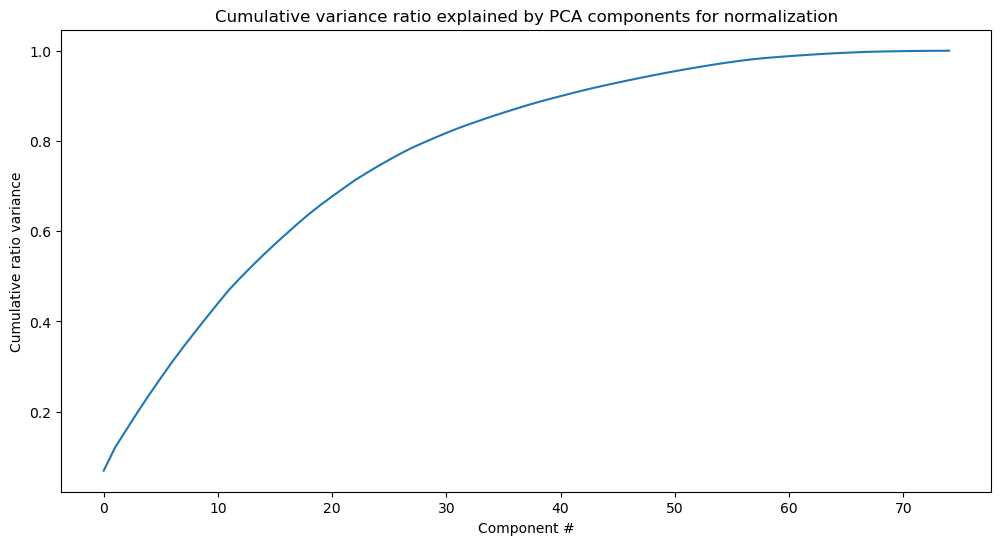

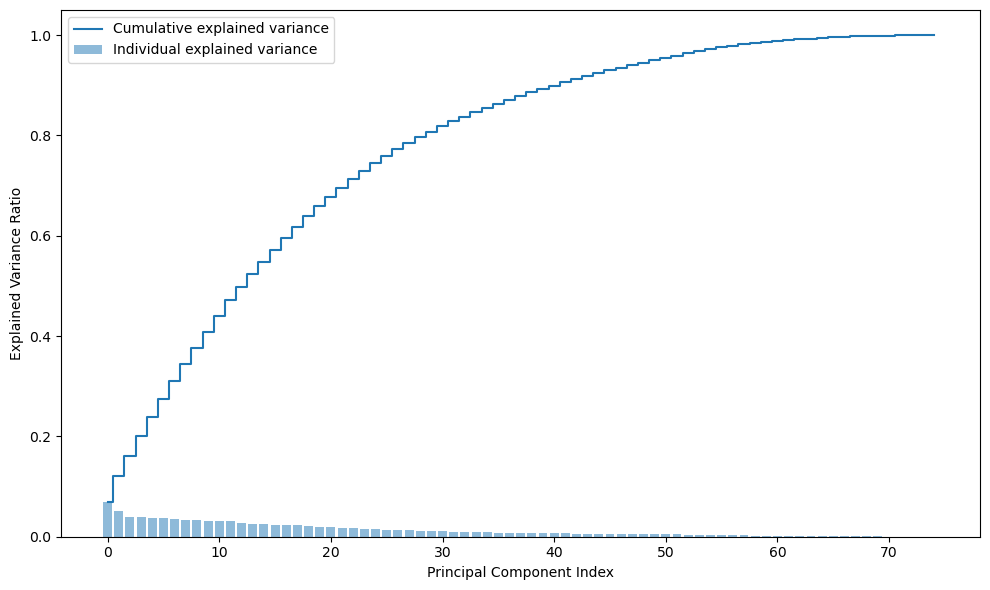

In [59]:
sns.reset_orig()
# 
plt.subplots(figsize=(12, 6))
plt.plot(pca_norm.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for normalization')
plt.show();
# 
eign_val_vec_plot(X_norm)

*[<u>`Go back`</u>](#Table)*
#### 5.2. PCA Normal Sum Variance Ratio<a class="anchor" id="NPCA_VSum"></a>

In [60]:
pd.DataFrame(pca_norm.explained_variance_ratio_.cumsum(),
                  columns=["Normal Feature Cumulative Sum"]).head(10)

,Normal Feature Cumulative Sum
0,0.069120
1,0.120646
2,0.160606
3,0.200219
4,0.238122
5,0.274767
6,0.310495
7,0.344356
8,0.376811
9,0.408772


*[<u>`Go back`</u>](#Table)*
### 6. Standardized Principal Component Analysis<a class="anchor" id="SPCA"></a>

In [61]:
pca_stand = PCA()
# fit & transform data
X_PCA_stand = pca_stand.fit_transform(X_stand)
# 
print(X_PCA_stand.shape)

(1470, 75)


#### 6.1. PCA Standard Plot<a class="anchor" id="SPCA_Plot"></a>

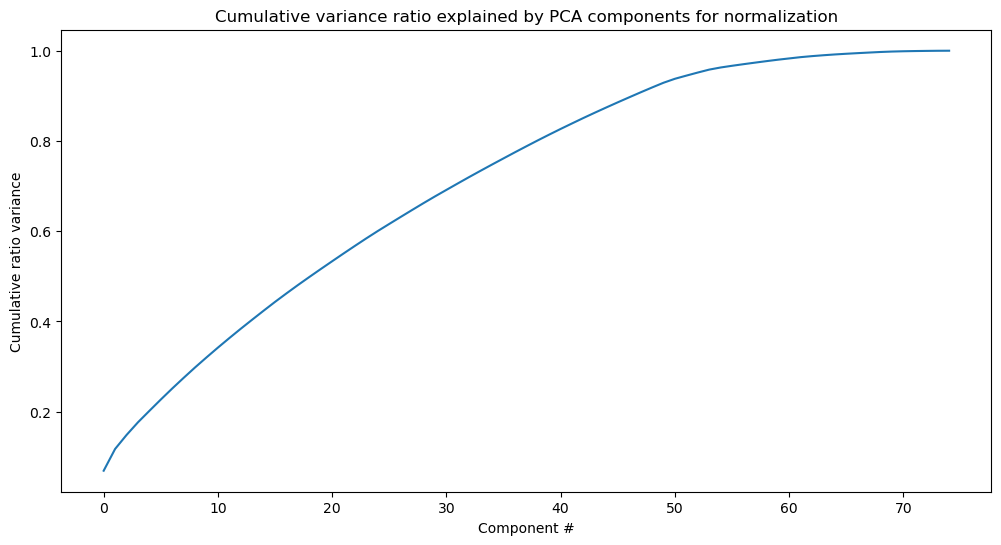

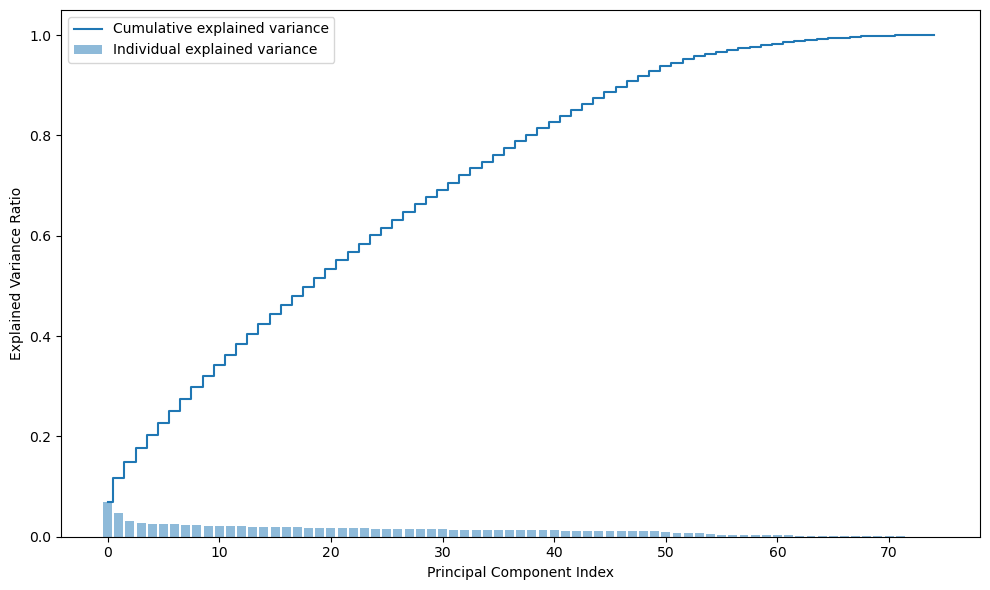

In [62]:
sns.reset_orig()
# 
plt.subplots(figsize=(12, 6))
plt.plot(pca_stand.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for normalization')
plt.show();
# 
eign_val_vec_plot(X_stand)

*[<u>`Go back`</u>](#Table)*
#### 6.2. PCA Standard Sum Variance Ratio<a class="anchor" id="SPCA_VSum"></a>

In [63]:
pd.DataFrame(pca_stand.explained_variance_ratio_.cumsum(),
                  columns=["Standard Feature Cumulative Sum"]).head(10)

,Standard Feature Cumulative Sum
0,0.069125
1,0.117350
2,0.148307
3,0.176408
4,0.201786
5,0.226885
6,0.251336
7,0.274971
8,0.298073
9,0.320279


### 7. Conclusion<a class="anchor" id="Conclusion"></a>

This exercise uses PCA to reduce the number of dimensions/features per observation. Therefore MinMaxScaler() would capture more closely related data with fewer features.